# Regressing 1D Data with a Single Neuron

This notebook provides you with a complete code
example that loads the data contained in `data_reg_1d_clean.csv`, trains a neuron to fit them, and finally uses the trained neuron to predict the values of the data in `data_reg_1d_clean_test.csv`.

## Loading the Data

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_1d_noisy.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[-1.77518182]
 [-0.23425708]
 [-0.5579727 ]
 [-1.42299491]
 [-1.33267476]
 [ 0.42106262]
 [-0.43637229]
 [-0.35196649]
 [-0.84510147]
 [ 0.25304355]]
y_gt: [[-0.90616699]
 [-0.40869915]
 [ 0.04325174]
 [-0.85396297]
 [-0.33620784]
 [ 0.47380813]
 [-0.22190112]
 [-0.03177962]
 [-0.12183236]
 [ 0.33207483]]


## Visualizing the Data

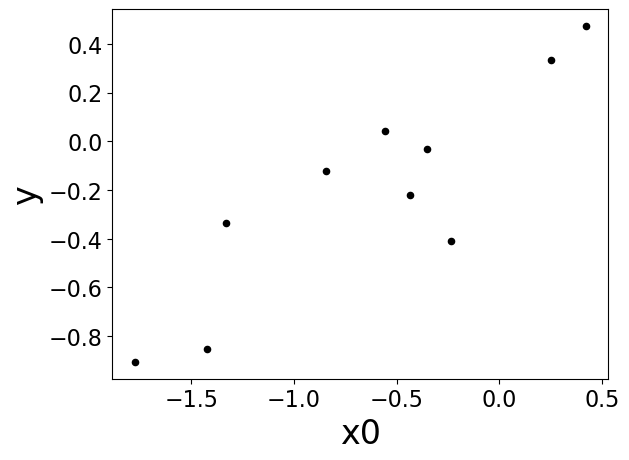

In [2]:
from plotting import plot_data_1d

plot_data_1d(x, y_gt, fig_name="fig_02_04a.pdf")  ### plot_data_1d(x, y_gt)

## Implementing a Single Neuron

Create a single neuron with one scalar weigth `w0` and one input `x` (which can be a scalar or a vector corresponding to multiple inputs) ...

In [3]:
def neuron_reg_1d(w0, x):
    """Artificial neuron for 1D regression."""
    return w0 * x

... randomly initialize its weight ...

In [4]:
from numpy.random import default_rng

rng = default_rng()
w0 = rng.standard_normal()

... obtain its predition `y_p` for the input data (which has the same shape as `x`) ...

In [5]:
y_p = neuron_reg_1d(w0, x)

... and visualize its predictions.

In [7]:
from plotting import plot_pred_1d

### plot_pred_1d(x, y_gt, y_p=neuron_reg_1d(w0, x))

## Training the Neuron

Train the neuron ...

In [8]:
num_samples = len(x)
num_train_iterations = 100
eta = .1 # Learning rate.

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples) # Select random sample.
    x0_selected = x[selected]
    y_gt_selected = y_gt[selected]
    
    y_p_selected = neuron_reg_1d(w0, x0_selected) # Neuron prediction.
    
    error = y_p_selected - y_gt_selected # Calculate error.
    
    w0 -= eta * error * x0_selected # Update neuron weight.

    print(f"i={i} w0={w0[0]:.2f} error={error[0]:.2f}")

i=0 w0=0.84 error=-0.43
i=1 w0=0.79 error=-0.59
i=2 w0=0.69 error=-0.72
i=3 w0=0.65 error=-0.46
i=4 w0=0.58 error=-0.54
i=5 w0=0.56 error=-0.13
i=6 w0=0.56 error=-0.02
i=7 w0=0.56 error=-0.19
i=8 w0=0.57 error=-0.24
i=9 w0=0.58 error=0.04
i=10 w0=0.56 error=-0.12
i=11 w0=0.57 error=0.06
i=12 w0=0.57 error=0.28
i=13 w0=0.58 error=0.27
i=14 w0=0.52 error=-0.44
i=15 w0=0.54 error=0.11
i=16 w0=0.54 error=-0.20
i=17 w0=0.55 error=0.28
i=18 w0=0.55 error=-0.19
i=19 w0=0.52 error=-0.35
i=20 w0=0.54 error=0.11
i=21 w0=0.54 error=-0.01
i=22 w0=0.51 error=-0.33
i=23 w0=0.48 error=-0.31
i=24 w0=0.49 error=0.05
i=25 w0=0.50 error=-0.21
i=26 w0=0.48 error=-0.32
i=27 w0=0.49 error=-0.27
i=28 w0=0.45 error=-0.32
i=29 w0=0.46 error=-0.28
i=30 w0=0.47 error=-0.22
i=31 w0=0.47 error=0.02
i=32 w0=0.46 error=-0.13
i=33 w0=0.43 error=-0.28
i=34 w0=0.46 error=0.25
i=35 w0=0.47 error=0.30
i=36 w0=0.47 error=0.02
i=37 w0=0.50 error=0.19
i=38 w0=0.51 error=-0.27
i=39 w0=0.53 error=0.13
i=40 w0=0.51 error=-0.34

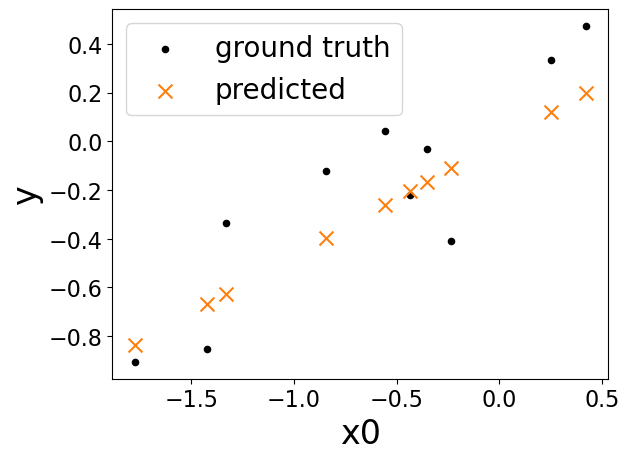

In [9]:
plot_pred_1d(x, y_gt, y_p=neuron_reg_1d(w0, x), fig_name="fig_02_04b.pdf")  ### plot_pred_1d(x, y_gt, y_p=neuron_reg_1d(w0, x))

## Testing the Trained Neuron

Check how the trained neuron works on the test data.

In [10]:
### (x_test, y_gt_test) = load_data(filename="data_reg_1d_clean_test.csv")

### plot_pred_1d(x_test, y_gt_test, y_p=neuron_reg_1d(w0, x_test))